In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0) # This makes the images larger in the notebook


In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [3]:
source = 'Videos/race_car.mp4'
cap = cv.VideoCapture(source)

In [4]:
if(cap.isOpened()== False): 
    print("Error opening video stream or file")
# This condition is used to check if the video is opened successfully

In [5]:
ret, frame = cap.read()

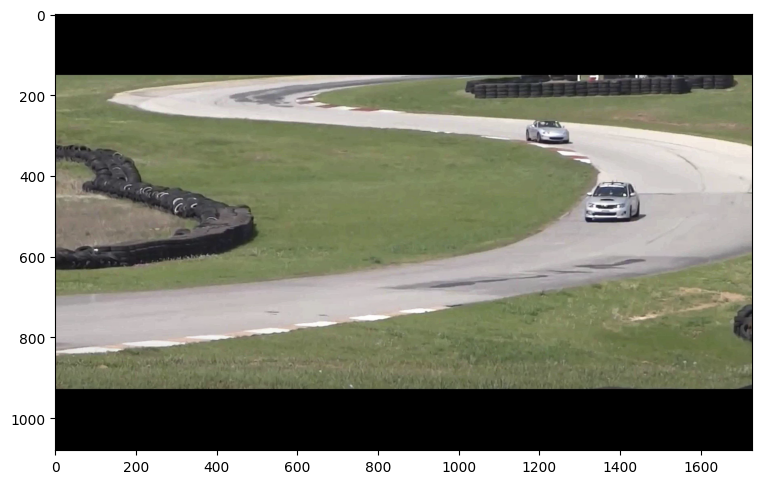

In [6]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

In [8]:
from IPython.display import HTML
HTML("""
<video width="640" height="480" controls autoplay loop>
    <source src="Videos/race_car.mp4" type="video/mp4">
</video>
""")

In [9]:
frame_width = int(cap.get(3)) # 3 is the index for width
frame_height = int(cap.get(4)) # 4 is the index for height
print(f"Frame width: {frame_width}, Frame height: {frame_height}")

Frame width: 1728, Frame height: 1080


In [10]:
out_avi = cv.VideoWriter('Videos/race_car_out.avi',
                         cv.VideoWriter_fourcc(*'XVID'),
                            30, # FPS
                            (frame_width, frame_height))
# Parameters:
# 1. Output file name
# 2. Codec used to compress the frames
# 3. Frames per second
# 4. Frame size (width, height)


In [11]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    # Write the frame to the output file
    out_avi.write(frame)

# Release the video capture and writer objects
cap.release()
out_avi.release()
